# AdaBoost from scratch

## Test AdaBoost

In [3]:
# Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print("Modules imported!")

Modules imported!


In [4]:
# Data Preprocessing
bankdata = pd.read_csv('bill_authentication.csv')
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

0.8380566801619433
|--- feature_0 <= 0.84
|   |--- class: 1
|--- feature_0 >  0.84
|   |--- class: 0



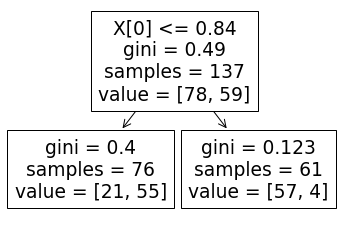

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.90)
clf1 = tree.DecisionTreeClassifier(max_depth = 1, splitter = 'random')
clf1 = clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(accuracy_score(y_pred, y_test))
x = tree.plot_tree(clf1)
print(tree.export_text(clf1))

In [84]:
class stump_boost:
    learners = [];
    n = 0
    T = 0
    a_s = []
    h_s = []
    X = None
    y = None
    
    def __init__(self, nLearner, X, y):
        self.n = nLearner
        self.X = np.array(X)
        self.y = np.array(y)
        for i in range(nLearner):
            self.learners.append(tree.DecisionTreeClassifier(max_depth = 1, splitter = 'random'))
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.99)
            self.learners[i].fit(X_train, y_train)
    
    def evaluate_stumps(self, X ,y):
        for i in range(self.n):
            print("Stump " + str(i) + " Accuracy: " + str(100 * accuracy_score(self.learners[i].predict(X), y)))
    
    def print_stumps(self):
        for i in range(self.n):
            print("Tree i: ")
            print(tree.export_text(self.learners[i]))
            
    def stump_mean_accuracy(self, X, y):
        mean = 0
        var = 0
        for i in range(self.n):
            mean += 100 * accuracy_score(self.learners[i].predict(X), y) / self.n
            var += (100 * accuracy_score(self.learners[i].predict(X), y))**2 / self.n
        return mean, var
    
    def boost(self, T):
        X = self.X
        y = self.y
        self.T = T
        n_L = self.n
        n_d = len(y)
        self.h_s = []
        self.a_s = []
        w_s = np.ones(n_d) / n_d
        e_s = np.zeros(n_L)
        Z = 1
        for t in range(T):
            for i in range(n_L):
                y_p = self.learners[i].predict(X)
                e_s[i] = np.sum(0.5 * w_s * (1 - y * y_p))
            h = np.argmin(e_s)
            e = np.min(e_s)
            a = 0.5 * np.log((1 - e) / e)
            self.h_s.append(h)
            self.a_s.append(a)
            w_s = w_s * np.exp(-a * y * np.array(self.learners[h].predict(X)))
            w_s = w_s / np.sum(w_s)
    
    def predict(self, X):
        ls = 0
        for i in range(self.T):
            ls += self.a_s[i] * self.learners[self.h_s[i]].predict(X)
        return np.sign(ls)


In [92]:
### TODO: 4(a) Implement an AdaBoost classifier with 5 base learners 
# nTrials: split the data randomly for nTrials times and compute the average test accuracy
nLearner = 5
nTrials = 1
T = 5

accuracies = np.zeros((nTrials,))
stump_accuracies = np.zeros((nTrials,))
y_ = 2 * y - 1

for t in range(nTrials):
    X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size = 0.20)
    sb = stump_boost(5, X_train, y_train)
    sb.boost(T)
    y_pred = sb.predict(X_test)
    acc = 100 * accuracy_score(y_test, y_pred)
    
    #print("accuracy: " + str(acc))
    accuracies[t] = acc
    stump_accuracies[t], _ = sb.stump_mean_accuracy(X_test, y_test)
            
print('The test accuracy for AdaBoost is: %d %%' % (accuracies.mean()))
print('The test accuracy for Mean Stumps is: %d %%' % (stump_accuracies.mean()))

The test accuracy for AdaBoost is: 86 %
The test accuracy for Mean Stumps is: 68 %


1
2
3
4
5
6
7
8
9


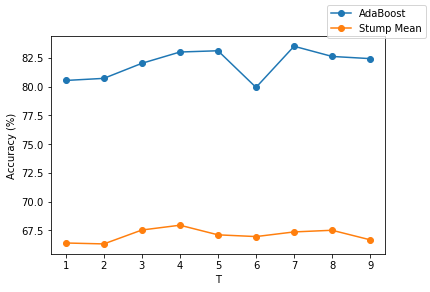

In [93]:
### TODO: 4(a) Implement an AdaBoost classifier with 5 base learners 
# nTrials: split the data randomly for nTrials times and compute the average test accuracy
nLearner = 5
nTrials = 50
T_max = 10


y_ = 2 * y - 1

means = np.zeros(T_max - 1)
stump_means = np.zeros(T_max - 1)

for T in range(1,T_max):
    accuracies = np.zeros((nTrials,))
    stump_accuracies = np.zeros((nTrials,))
    print(T)
    for t in range(nTrials):
        X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size = 0.20)
        sb = stump_boost(5, X_train, y_train)
        sb.boost(T)
        y_pred = sb.predict(X_test)
        acc = 100 * accuracy_score(y_test, y_pred)
        
        #print("accuracy: " + str(acc))
        accuracies[t] = acc
        stump_accuracies[t], _ = sb.stump_mean_accuracy(X_test, y_test)
    means[T - 1] = accuracies.mean()
    stump_means[T - 1] = stump_accuracies.mean()

fig, ax = plt.subplots()
ax.plot(range(1, T_max), means, label = "AdaBoost", marker = "o")
ax.plot(range(1, T_max), stump_means, label = "Stump Mean", marker = "o")
ax.set_xlabel("T")
ax.set_ylabel("Accuracy (%)")
fig.legend()

nLearners: 1
nLearners: 2
nLearners: 3
nLearners: 4
nLearners: 5
nLearners: 6
nLearners: 7
nLearners: 8
nLearners: 9
nLearners: 10
nLearners: 11
nLearners: 12
nLearners: 13
nLearners: 14
nLearners: 15
nLearners: 16
nLearners: 17
nLearners: 18
nLearners: 19


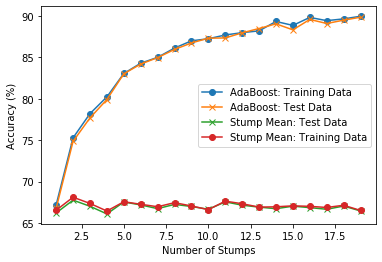

In [94]:
### TODO: 4(a) Implement an AdaBoost classifier with 5 base learners 
# nTrials: split the data randomly for nTrials times and compute the average test accuracy
nLearners = 20
nTrials = 150
T_max = 10

y_ = 2 * y - 1

means = np.zeros(nLearners - 1)
stump_means = np.zeros(nLearners - 1)
tr_means = np.zeros(nLearners - 1)
tr_stump_means = np.zeros(nLearners - 1)

for L in range(1,nLearners):
    print("nLearners: " + str(L))
    accuracies = np.zeros((nTrials,))
    stump_accuracies = np.zeros((nTrials,))
    tr_accuracies = np.zeros((nTrials,))
    tr_stump_accuracies = np.zeros((nTrials,))
    for t in range(nTrials):
        X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size = 0.20)
        sb = stump_boost(L, X_train, y_train)
        sb.boost(T_max)
        y_pred = sb.predict(X_test)
        acc = 100 * accuracy_score(y_test, y_pred)
        accuracies[t] = acc
        stump_accuracies[t], _ = sb.stump_mean_accuracy(X_test, y_test)
        y_pred = sb.predict(X_train)
        acc = 100 * accuracy_score(y_train, y_pred)
        tr_accuracies[t] = acc
        tr_stump_accuracies[t], _ = sb.stump_mean_accuracy(X_train, y_train)
        
    means[L - 1] = accuracies.mean()
    tr_means[L - 1] = tr_accuracies.mean()
    stump_means[L - 1] = stump_accuracies.mean()
    tr_stump_means[L - 1] = tr_stump_accuracies.mean()

fig, ax = plt.subplots()
ax.plot(range(1, nLearners), tr_means, label = "AdaBoost: Training Data", marker = 'o')
ax.plot(range(1, nLearners), means, label = "AdaBoost: Test Data", marker = 'x')
ax.plot(range(1, nLearners), stump_means, label = "Stump Mean: Test Data", marker = 'x')
ax.plot(range(1, nLearners), tr_stump_means, label = "Stump Mean: Training Data", marker = 'o')
ax.set_xlabel("Number of Stumps")
ax.set_ylabel("Accuracy (%)")
ax.legend()
fig.savefig("adaboost_nlearners.png", bbox_inches = 'tight')